<a href="https://colab.research.google.com/github/anniepeacock/sar_notebooks/blob/devel/Forest_Disturbance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # SAR Application: Forest Disturbance
### I. How to create SAR quicklook images of forest disturbance?

* Useful Products: Polarimetric Synthetic Aperture Radar (PolSAR) time series (in HH, HV, and if possible VV), Pauli Decomposition from multiple dates, HV scatterplots, and Interferometric Synthetic Aperture Radar (InSAR) coherence from InSAR pair where the dates are pre and post disturbance.
* Useful Wavelengths: L-Band
* Relevant Sensors: UAVSAR, ALOS
* Qualitative Browse Products: Vegetation volume and coherence

### II. How to interpret SAR images of forest disturbance?

To view SAR images of forest disturbance, compare RGB images (HH, HV, VV) before and after disturbance. After disturbance, the RGB image should show an increased HH component (bare ground) and a lower vegetation component (HV), and other disturbance evidence such as gold mining and burned areas show as bare ground (purple). However, change point detection for deforestation can be difficult with just visual interpretation. In areas of large forest disturbance (e.g. deforestation), look at InSAR decorrelation from before and after. 

The overlay of different polarization channels allows users to visually classify a scene by its backscattering mechanism, such as surface scattering (strong HH and VV return), volume scattering (strong HV return) and double-bounce scattering (strong HH return). Thus in RGB images, areas dominated by green (HV) intensity are typically vegetated areas. Areas dominated by shades of pink (HH+HV) intensity are typically inundated forests, vegetated fields, or urban areas. Black and dark grey areas are usually smooth surfaces (roads, open water, smooth bare ground) where there is little radar backscatter.  

### Explain how HH and HV interact differently with forest

# UAVSAR Forest Disturbance Examples

1. Amazon Gold Mining - Pauli Decomposition RGB Comparison
2. Mammoth Tree Die-Off - Pauli Decomposition RGB Comparison
3. Napa Valley Deforestation - Pauli Decomposition RGB Comparison, HV backscatter, Coherence Image


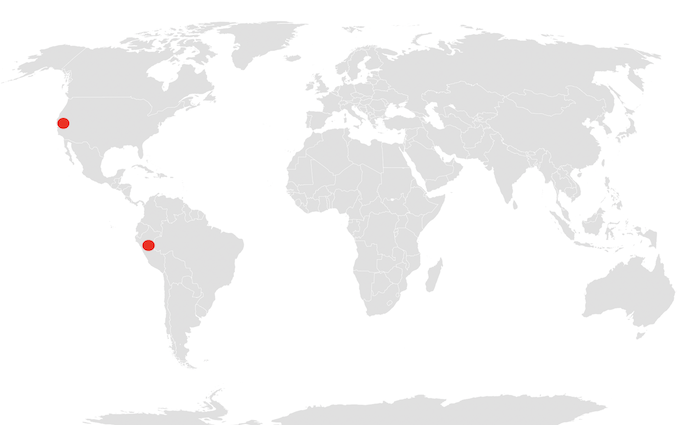

The content of this notebook is as follows:

1. [Running the Notebook](#s1)
2. [Amazon Gold Mining](#s2)
3. [Mammoth Tree C02 Die-off](#s3)
4. [Napa Valley Soda Canyon](#s4)

<a name="s1"></a>
## 1. Running the Notebook
* To run the content, select the play button in the upper left corner of each code cell or press shift-enter.

### Python Packages:
This routine using the following python libaries. Some are already included in the Google Colab environment and others are first installed using pip in the cell below. 

In [ ]:
!pip install rasterio --quiet

import rasterio as rio
#import rasterio.plot
#from rasterio.plot import show

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from pathlib import Path

import numpy as np
import math

import ipywidgets as wg
from IPython.display import Image

     |████████████████████████████████| 19.3 MB 13.1 MB/s 


<a name="s2"></a>
## 2. Amazon Gold Mining

UAVSAR flew over Madre de Dios, Peru in 2013 and 2014. The SAR line captures a forested area and a region of gold mining in the Amazon. Line PeruMd_25602 was collected March 3, 2013 and line PeruMd_25604 was acquired May 01, 2014. The lines do not share the same coverage everywhere but have overlap.  

UAVSAR 2013: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=PeruMd_25602_13050_001_130330_L090_CX_01#data

UAVSAR 2014: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=PeruMd_25604_14057_001_140501_L090_CX_01#data

Image credit: New York Times

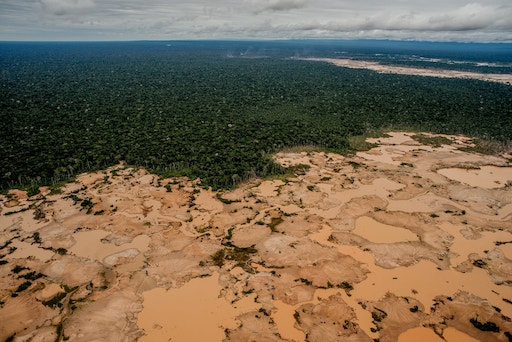

### RGB Comparison
 Between the two UAVSAR acquisitions, expansion of deforestation areas are visible, particularly in the lower portion of the overlapping images. Newly deforested areas have a decreased HV component and decreased volume scattering, and instead the bare ground experiences surface scattering and appears purple instead of green in the RGB. These images also show a change in inundation, with the expansion of the pink, double bounce areas in the upper portion of the overlap closer to the river.

The red circle below highlights ann area of deforestation. In contrast, the blue circle highlights an area of different inundation between the two acquisitions.

In [ ]:

# Interactive Map Inputs
image1 = "Peru2014/{z}/{x}/{y}.png"
image2 = "Peru2013/{z}/{x}/{y}.png"

class CustomLocalLayer(LocalTileLayer):
    tms = Bool(True).tag(sync=True, o=True)

m = Map(basemap=basemap_to_tiles(basemaps.Esri.WorldImagery),
    center=(-12.66, -69.4),
    zoom=12
    
)

layer = CustomLocalLayer(tms=True, path=image1, name="March 2013")
layer2 = CustomLocalLayer(tms=True, path=image2, name="May 2014")

## Ipyleaflet Controls
control = SplitMapControl(left_layer=layer, right_layer=layer2)
legend = LegendControl({"HH-VV (Double Bounce)":"#FF0000", "HV+VH (Volume Scattering)":"#008000", "HH+VV (Specular Scattering)":"#0000FF"}, name="RGB Channels", position="topright")
description = LegendControl({"Open Water":"#000000","Bare ground":"#261947", "Inundated":"#e8cef5", "Forest":"#7eab91"}, name="Interpretation", position="topright")
m.add_control(legend)
m.add_control(description)
m.add_control(control)
m.add_control(LayersControl())
m.add_control(FullScreenControl())
m.add_control(ScaleControl(position='bottomleft', metric=True, imperial=False, maxwidth=500))

inundation_change = (-12.7, -69.49)
deforestation = (-12.66, -69.4)

## Inundation Change Circle
circle_marker = CircleMarker()
circle_marker.location = (-12.7, -69.5)
circle_marker.radius = 40
circle_marker.color = "blue"
circle_marker.opacity = 0.6
circle_marker.fill_opacity = 0

## Deforestation Area Circle
deforestation = CircleMarker()
deforestation.location = (-12.693, -69.42)
deforestation.radius = 60
deforestation.color = "red"
deforestation.opacity = 0.7
deforestation.fill_opacity = 0

m.add_layer(deforestation)
m.add_layer(circle_marker)

m.add_layer(layer)
m.add_layer(layer2)

m

Map(center=[-12.66, -69.4], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_…

In [ ]:
# m.save('my_map.html', title='My Map')
# https://ipyleaflet.readthedocs.io/en/latest/api_reference/map.html

<a name="s3"></a>
## 3. Mammoth Tree C02 Die-off

"Mammoth Mountain, a young volcano in eastern California, sits on the southwest rim of Long Valley Caldera. In 1994, scientists detected high concentrations of CO2 gas in the soil on Mammoth Mountain. This invisible gas, seeping from beneath the volcano, is killing trees on the sides of the mountain and can pose a threat to humans. Recent measurements indicate that the total rate of CO2 gas emission at Mammoth Mountain is close to 300 tons per day. In this photo, large areas of dead and dying trees are visible near Horseshoe Lake, on the southeast flank of Mammoth Mountain. (Copyrighted photo courtesy of John D. Rogie.)"

UAVSAR Product Page: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=lngvly_35504_14142_004_141007_L090_CX_01#data


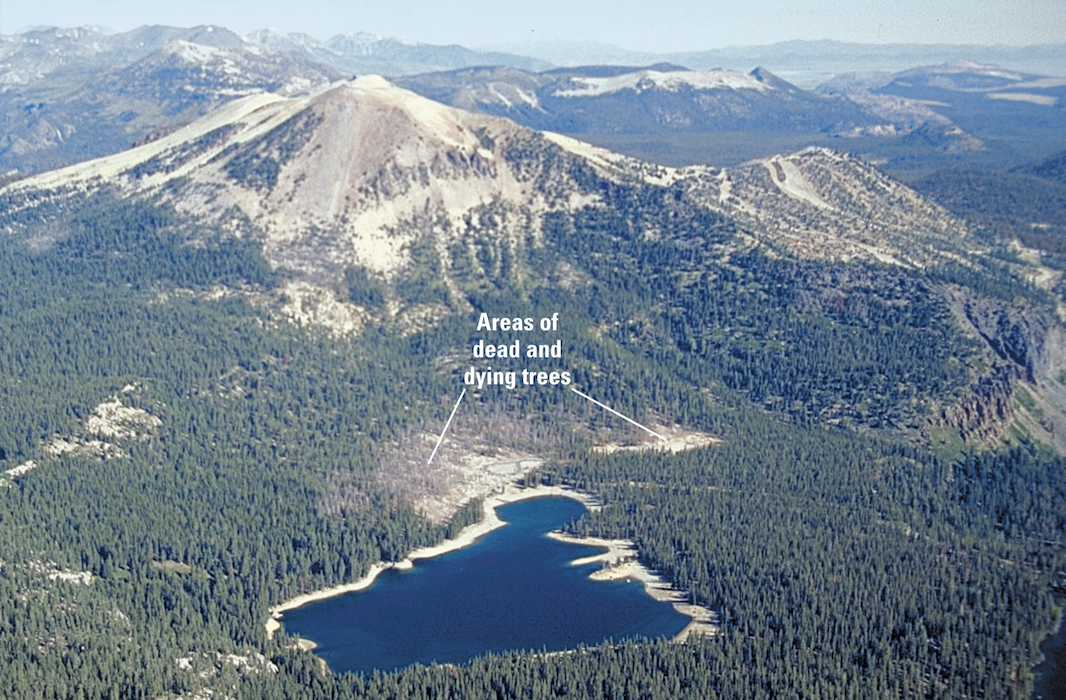

In this UAVSAR acquistion, can see the bare ground areas (purple) adjacent to the forested mountain side (green).
The red circle below delineates the lake as seen in the image of Mammoth Mountain above. North of the lake area areas of dead and dying trees, they appear as purple or bare ground in the UAVSAR Pauli Decomposition RGB.

In [ ]:
# Interactive Map Inputs
imag3 = "mammoth2014/{z}/{x}/{y}.png"

class CustomLocalLayer(LocalTileLayer):
    tms = Bool(True).tag(sync=True, o=True)

m = Map(basemap=basemap_to_tiles(basemaps.Esri.WorldImagery),
    center=(37.6093, -119.0183),
    zoom=13
    
)

layer1 = basemap_to_tiles(basemaps.Esri.WorldImagery)
layer2 = CustomLocalLayer(tms=True, path=imag3, name="Mammoth, 2014")

## Ipyleaflet Controls
control = SplitMapControl(left_layer=layer2, right_layer=layer1)

## Ipyleaflet Controls
control = SplitMapControl(left_layer=layer1, right_layer=layer2)
legend = LegendControl({"HH-VV (Double Bounce)":"#FF0000", "HV+VH (Volume Scattering)":"#008000", "HH+VV (Specular Scattering)":"#0000FF"}, name="RGB Channels", position="topright")
description = LegendControl({"Open Water":"#000000","Bare ground":"#261947", "Inundated":"#e8cef5", "Forest":"#7eab91"}, name="Interpretation", position="topright")
m.add_control(legend)
m.add_control(description)
m.add_control(control)
m.add_control(LayersControl())
m.add_control(FullScreenControl())
m.add_control(ScaleControl(position='bottomleft', metric=True, imperial=False, maxwidth=500))

## Deforestation Area Circle
circle_marker = CircleMarker()
circle_marker.location = (37.61, -119.0199)
circle_marker.radius = 50
circle_marker.color = "red"
circle_marker.opacity = 0.7
circle_marker.fill_opacity = 0
m.add_layer(circle_marker)

m

Map(center=[37.6093, -119.0183], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

<a name="s4"></a>
## 4. Napa Valley Soda Canyon
Deforestation has been occurring in Napa Valley, California, largely for vineyard expansions. Fields changing from forested areas to vineyard fields, is visible between the below UAVSAR acquisitions. When an area is deforested, the Pauli decomposition shows more contribution of the surface component (bare ground, purple). 

There are a number of areas with visible deforestation and expansion of vineyard extent.

October 2017: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=SanAnd_23513_17112_004_171016_L090_CX_01#data

November 2009: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=SanAnd_23513_09091_008_091117_L090_CX_01#data


* Napa Coherence: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=SanAnd_23513_16034-006_17021-002_0343d_s01_L090_01#data
* Napa March 2016: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=SanAnd_23513_16034_006_160325_L090_CX_01#data
* Napa March 2017: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=SanAnd_23513_17021_002_170303_L090_CX_01#data

In [ ]:
# Interactive Map Inputs
image4 = "napa2009/{z}/{x}/{y}.png"
image5 = "napa2017/{z}/{x}/{y}.png"

class CustomLocalLayer(LocalTileLayer):
    tms = Bool(True).tag(sync=True, o=True)

m = Map(basemap=basemap_to_tiles(basemaps.Esri.WorldImagery),
    center=(38.45, -122.33),
    zoom=13
    
)

layer = CustomLocalLayer(tms=True, path=image4, name="2009")
layer2 = CustomLocalLayer(tms=True, path=image5, name="2017")

## Ipyleaflet Controls
control = SplitMapControl(left_layer=layer, right_layer=layer2)
legend = LegendControl({"HH-VV (Double Bounce)":"#FF0000", "HV+VH (Volume Scattering)":"#008000", "HH+VV (Specular Scattering)":"#0000FF"}, name="RGB Channels", position="topright")
description = LegendControl({"Open Water":"#000000","Bare ground":"#261947", "Inundated":"#e8cef5", "Forest":"#7eab91"}, name="Interpretation", position="topright")
m.add_control(legend)
m.add_control(description)
m.add_control(control)
m.add_control(LayersControl())
m.add_control(FullScreenControl())
m.add_control(ScaleControl(position='bottomleft', metric=True, imperial=False, maxwidth=500))

## Deforestation 1 Circle
deforestation1 = CircleMarker()
deforestation1.location = (38.47, -122.36)
deforestation1.radius = 40
deforestation1.color = "blue"
deforestation1.opacity = 0.6
deforestation1.fill_opacity = 0

## Deforestation 2 Circle
deforestation2 = CircleMarker()
deforestation2.location = (38.462, -122.315)
deforestation2.radius = 40
deforestation2.color = "red"
deforestation2.opacity = 0.7
deforestation2.fill_opacity = 0

m.add_layer(deforestation1)
m.add_layer(deforestation2)

m

Map(center=[38.45, -122.33], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom…

### HH Coherence

Lower coherence suggests area with more change relative to other pixels in the same image. Dark areas are where coherence is closer to 0 vs. bright where coherehce is closer to 1.

Coherence March 2016 and March 2017: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=SanAnd_23513_16034-006_17021-002_0343d_s01_L090_01#data

March 2016: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=SanAnd_23513_16034_006_160325_L090_CX_01#data

March 2017: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=SanAnd_23513_17021_002_170303_L090_CX_01#data

## Other Resources



## References

Mammoth Tree Die Off: https://pubs.usgs.gov/dds/dds-81/Intro/facts-sheet/fs172-96.pdf

Napa Valley: http://sodacanyonroad.org/forum.php?t=1254


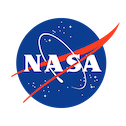

The research was carried out at the Jet Propulsion Laboratory, California Institute of Technology, under a contract with the National Aeronautics and Space Administration (80NM0018D0004)

© 2020. California Institute of Technology. Government sponsorship acknowledged. 